In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

import hickle as hkl
from torch.nn import Softmax

from influencer_games.utils.utilities import *
from influencer_games.domains.resource_distributions import *
from influencer_games.utils.data_mangement import *

from influencer_games.rl_dynamics.RL_visualization import *
from influencer_games.rl_dynamics.influencer_game_sync import influencer_env_sync
from influencer_games.rl_dynamics.IQL_sync import IQL_sync
from influencer_games.utils.rl_utils.IQL_utilities import *
from influencer_games.utils.rl_utils.MARL_utilities import *
from influencer_games.utils.rl_utils.my_parse import add_rl_example_script_args


from influencer_games.rl_dynamics.expirements import *


In [2]:
resource_parameters_gaussian=[[.1,.1],[.25,.75],[1,1]] #[[sd1, sd2,], [mean1,mean2], [factor1,factor2]]
#actual resource distribution

bin_points=np.linspace(.001, .999, 100)
resource_distribution2=resource_distribution_choice(bin_points=bin_points,resource_type='multi_modal_gaussian_distribution_1D',resource_parameters=resource_parameters_gaussian)

In [12]:
parser = add_rl_example_script_args(default_reward=1, default_iters=50, default_timesteps=100000)
parser.set_defaults(
    enable_new_api_stack=True,
    resource_distribution=resource_distribution2,
)

args=parser.parse_args(args=[])
env_config_main={"num_agents": 2,"initial_postion":np.array([.5,.5,.5,.5]),"bin_points":args.bin_points,"resource_distribution":args.resource_distribution,"step_size":.1,"infl_configs":args.infl_configs,"parameters":np.array([.35,.35,.35,.35]),"domain_type":args.domain_type,"domain_bounds":args.domain_bounds,"fixed_pa":args.fixed_pa,"NUM_ITERS":100,}
env=influencer_env_async(config=env_config_main)

In [13]:
episode_configs={"TYPE":"Cosine_Anneling","episode_max":100,"episode_min":10}
temperature_configs={"TYPE":"Cosine_Anneling_Distance","temperature_max":1,"temperature_local_min":.7,"temperature_local_max":.3,"temperature_min":0.5}
epsilon_configs={"type":"Cosine_Anneling","epsilon":.3,"e_max":.8,"e_min":.3}


In [14]:
q_mean=run_expriment(action_type="async",env_configs=env_config_main,trials=2)

Trial: 1/2 complete
Trial: 2/2 complete


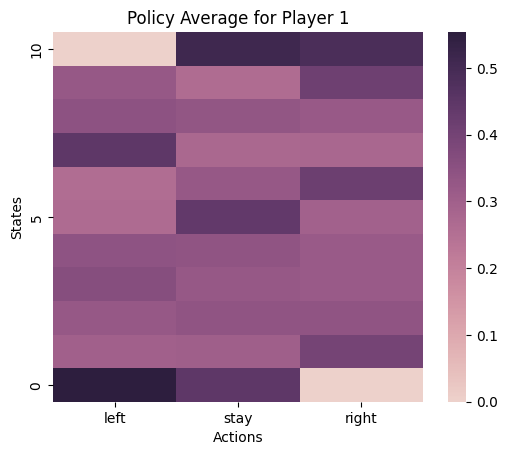

In [15]:
fig,_=policy_histogram(q_tensor=q_mean,player_id=0)
fig

In [16]:
pos_matrix, reward_matrix=policy_determinsiticly_to_actions(env=influencer_env_sync(env_config_main),q_tensor=q_mean,intial_postion=np.array([.1,.2,.3,.8]),num_step=100,temperature=0.5)

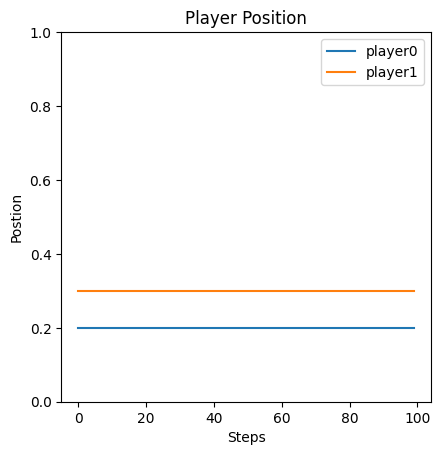

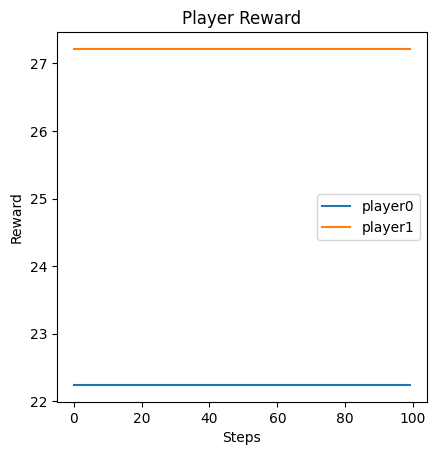

In [17]:
pos_plot(pos_matrix=pos_matrix,possible_agents=env.possible_agents,bounds=env.domain_bounds)
reward_plot(reward_matrix=reward_matrix,possible_agents=env.possible_agents)